In [1]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


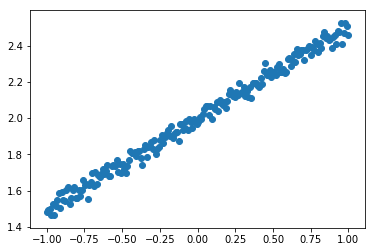

In [2]:
X = np.linspace(-1, 1, 200) #在-1和1之间均分200个数
Y = 0.5*X + 2 + np.random.normal(0, 0.03, 200)# 正态分布
plt.scatter(X, Y)
plt.show()

In [3]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

In [4]:
model = Sequential()
model.add(Dense(units = 3, input_dim = 1))
model.add(Dense(units = 1))
model.compile(loss = 'mse', optimizer = 'sgd')

In [5]:
print('Training ------------------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step  % 100 == 0:
        print('train cost: ', cost)

Training ------------------
train cost:  3.9310138
train cost:  0.0050737374
train cost:  0.0014165174
train cost:  0.00094015914


In [6]:
print('Test ------------------')
cost = model.evaluate(X_test, Y_test, batch_size = 40)
print('test cost:', cost)
W, b = model.layers[1].get_weights()
print('weights=', W, '\nbias=', b)

Test ------------------
40/40 [==============================] - 0s 850us/step
test cost: 0.0013653455534949899
weights= [[-0.42454585]
 [ 0.21525522]
 [ 0.98314136]] 
bias= [1.059973]


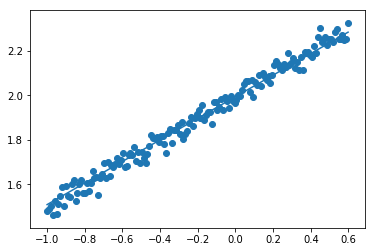

In [7]:
Y_pred = model.predict(X_train)
plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_pred)
plt.show()

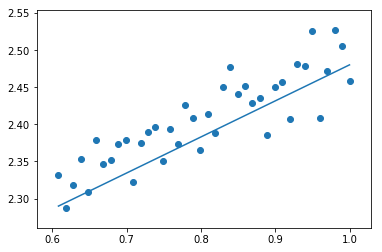

In [8]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()